### IMDB
    - 쇼생크 탈출
    - User review(1000개) => 크롤링 => Word Cloud

In [2]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import warnings
import math
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [50]:
driver = webdriver.Chrome()
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver.get(url)

In [51]:
divs = driver.find_elements(By.CLASS_NAME, 'lister-item')
len(divs)

25

In [60]:
div = divs[1]

In [53]:
# 제목
div.find_element(By.CLASS_NAME, 'title').text

"Some birds aren't meant to be caged."

In [54]:
# 평점
div.find_element(By.XPATH, '//*[@id="main"]/section/div[2]/div[2]/div[1]/div/div[1]/div[1]/span/span[1]').text

'10'

In [63]:
# 내용 
if len(div.find_element(By.CLASS_NAME, 'expander-icon-wrapper').get_attribute('class')) != 0:
    div.find_element(By.CLASS_NAME, 'expander-icon-wrapper').click()
    div.find_element(By.CLASS_NAME, 'text.show-more__control').text

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00B2DCE3+50899]
	(No symbol) [0x00ABE111]
	(No symbol) [0x009C5450]
	(No symbol) [0x009F1846]
	(No symbol) [0x009E94A5]
	(No symbol) [0x00A0B8FC]
	(No symbol) [0x009E8EC6]
	(No symbol) [0x00A0BC54]
	(No symbol) [0x00A1E01C]
	(No symbol) [0x00A0B6F6]
	(No symbol) [0x009E7708]
	(No symbol) [0x009E886D]
	GetHandleVerifier [0x00D93EAE+2566302]
	GetHandleVerifier [0x00DC92B1+2784417]
	GetHandleVerifier [0x00DC327C+2759788]
	GetHandleVerifier [0x00BC5740+672048]
	(No symbol) [0x00AC8872]
	(No symbol) [0x00AC41C8]
	(No symbol) [0x00AC42AB]
	(No symbol) [0x00AB71B7]
	BaseThreadInitThunk [0x76C70099+25]
	RtlGetAppContainerNamedObjectPath [0x77AB7B6E+286]
	RtlGetAppContainerNamedObjectPath [0x77AB7B3E+238]


In [36]:
# 25개 more load
driver.find_element(By.CLASS_NAME, 'ipl-load-more__button').click()

In [67]:
len(driver.find_elements(By.CLASS_NAME, 'expander-icon-wrapper'))

25

In [ ]:
driver = webdriver.Chrome()
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')
divs = soup.select('.lister-item')
temp = divs[0].select_one('.text.show-more__control').get_text()
driver.close()
print(temp)

The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn't give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the f

- 25 contents load => append

In [9]:
driver = webdriver.Chrome()
texts = []

url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver.get(url)
for i in range(40):
    divs = driver.find_elements(By.CLASS_NAME, 'lister-item')
    for j in range(25):
        try:
            icon = divs[j+i*25].find_element(By.CLASS_NAME, 'expander-icon-wrapper')
            icon.click()
            time.sleep(2)
        except:
            continue
        # 제목
        title = divs[j+i*25].find_element(By.CLASS_NAME, 'title').text
        # 평점
        star = divs[j+i*25].find_element(By.XPATH, '//*[@id="main"]/section/div[2]/div[2]/div[1]/div/div[1]/div[1]/span/span[1]').text
        content = divs[j+i*25].find_element(By.CLASS_NAME, 'text.show-more__control').text
        texts.append({'제목':title, '평점':star, '내용':content})
    driver.find_element(By.CLASS_NAME, 'ipl-load-more__button').click()
    time.sleep(4)
driver.close()

In [11]:
pd.DataFrame(texts)

,제목,평점,내용
0,Some birds aren't meant to be caged.,10,The Shawshank Redemption is written and direct...
1,Don't Rent Shawshank.,10,I'm trying to save you money; this is the last...
2,This is How Movies Should Be Made,10,This movie is not your ordinary Hollywood flic...
3,A classic piece of unforgettable film-making.,10,"In its Oscar year, Shawshank Redemption (writt..."
4,"Enthralling, fantastic, intriguing, truly rema...",10,Shawshank Redemption is without doubt one of t...
...,...,...,...
410,Unbearably dull,10,I can't think of any movie more monstrously ov...
411,A brilliant classic,10,"""The Shawshank Redemption"" is simply a brillia..."
412,Freedom,10,I still don't understand what these two Italia...
413,Resilience prevails.,10,"Off the hop, I don't mean to upset people with..."


- load all pages => append

In [17]:
driver = webdriver.Chrome()
texts = []

url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver.get(url)

load_btn = driver.find_element(By.CLASS_NAME, 'ipl-load-more__button')
for i in range(39):
    load_btn.click()
    time.sleep(4)
    
divs = driver.find_elements(By.CLASS_NAME, 'lister-item')
soup = BeautifulSoup(driver.page_source, 'html.parser')
divs_soup = soup.select('.lister-item')
# icon = driver.find_elements(By.CLASS_NAME, 'ipl-expander__icon.expander-icon')
# for i in icon:
#     i.click()
#     time.sleep(3)
    
for i in range(40):
    for j in range(25):
        # 제목
        title = divs[j+i*25].find_element(By.CLASS_NAME, 'title').text
        # 평점
        star = divs[j+i*25].find_element(By.XPATH, '//*[@id="main"]/section/div[2]/div[2]/div[1]/div/div[1]/div[1]/span/span[1]').text
        # 내용
        content = divs_soup[j+i*25].select_one('.text.show-more__control').get_text()
        texts.append({'제목':title, '평점':star, '내용':content})
driver.close()

IndexError: list index out of range

In [23]:
df = pd.DataFrame(texts)

In [28]:
with open('./data/review.txt', 'w') as f:
    for temp in df.내용:
        f.write(temp + '\n')

In [29]:
with open('./data/review.txt', 'r') as f:
    x = f.read()

'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

In [19]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# WordCloud에서 제공하는 불용어
sw_wc = STOPWORDS

In [36]:
wc = WordCloud(
        background_color='black',
        max_words=4000,
        stopwords=sw_wc
    ).generate(x)

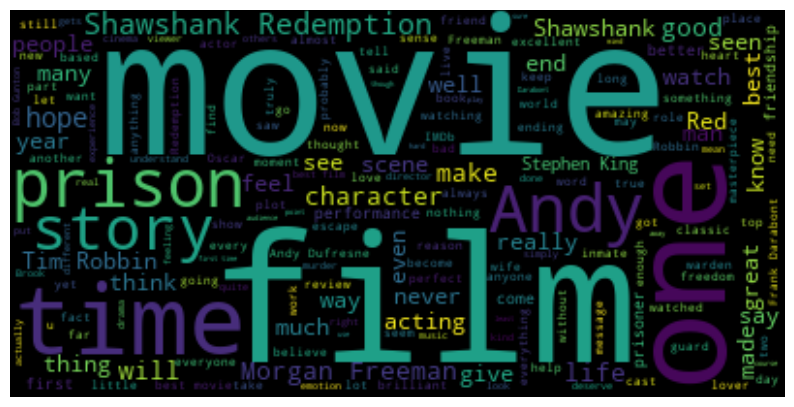

In [37]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()